In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np

import matplotlib
import matplotlib.pyplot as plt # Plotting

# # from matplotlib.cm import get_cmap
# from matplotlib.colors import LogNorm # Look up table
# from matplotlib.colors import PowerNorm # Look up table
# # import matplotlib.colors as mcolors

font = {'family' : 'serif',
        #'weight' : 'bold',
         'size'   : 12
       }
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

# # from pymoo.algorithms.moo.nsga2 import NSGA2
# # from pymoo.factory import get_problem
# # from pymoo.optimize import minimize
# # from pymoo.visualization.scatter import Scatter
# # from pymoo.core.problem import ElementwiseProblem

from gvxrPython3 import gvxr
from gvxrPython3 import json2gvxr

Wed Jul 10 17:40:06 2024 (WW) Spekpy is not installed, try Xpecgen instead.
Wed Jul 10 17:40:06 2024 (WW) Xpecgen is not installed either.


SimpleGVXR 2.0.8 (2024-07-10T12:07:54) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.8 (2024-07-10T12:07:53) [Compiler: GNU g++] on Linux


# Create a mock simulation environment

In [3]:
json2gvxr.initGVXR("../data/find_energy-mock_fuel.json", "OPENGL")

Create an OpenGL context: 1500x500


Wed Jul 10 17:40:07 2024 ---- Create window (ID: -1)
Wed Jul 10 17:40:07 2024 ---- Request an interactive OpenGL context
Wed Jul 10 17:40:07 2024 ---- Initialise GLFW
Wed Jul 10 17:40:07 2024 ---- Create an OpenGL window with a 3.2 context.
Wed Jul 10 17:40:08 2024 ---- Make the window's context current
Wed Jul 10 17:40:08 2024 ---- Initialise GLEW
Wed Jul 10 17:40:08 2024 ---- OpenGL vendor: NVIDIA Corporation
Wed Jul 10 17:40:08 2024 ---- OpenGL renderer: NVIDIA GeForce RTX 4060 Ti/PCIe/SSE2
Wed Jul 10 17:40:08 2024 ---- OpenGL version: 3.2.0 NVIDIA 545.23.08
Wed Jul 10 17:40:08 2024 ---- Use OpenGL 4.5.
Wed Jul 10 17:40:08 2024 ---- Initialise the X-ray renderer if needed and if possible


In [4]:
json2gvxr.initSamples(verbose=0)

Wed Jul 10 17:40:08 2024 ---- file_name:	/home/fpvidal/PROGRAMMING/GitHub/gVXR-SPIE2024/data/matrix.stl	nb_faces:	396	nb_vertices:	1188	bounding_box (in cm):	(-0.4, -0.2, -0.4)	(0.4, 0.2, 0.4)
Wed Jul 10 17:40:08 2024 ---- file_name:	/home/fpvidal/PROGRAMMING/GitHub/gVXR-SPIE2024/data/kernels.stl	nb_faces:	3960	nb_vertices:	11880	bounding_box (in cm):	(-0.384749, -0.194652, -0.222106)	(0.0497327, 0.179446, 0.2947)


# Linear attenuation coefficients

In [5]:
energy_set_DIAD = []
energy_set_I12 = []

pellet_mu_set_DIAD = []
pellet_mu_set_I12 = []

insert_mu_set_DIAD = []
insert_mu_set_I12 = []

pellet_mu_rho_set_DIAD = []
pellet_mu_rho_set_I12 = []

insert_mu_rho_set_DIAD = []
insert_mu_rho_set_I12 = []



pellet_rho = gvxr.getDensity("Matrix")
insert_rho = gvxr.getDensity("Kernels")


for i in range(7,38+1):
    energy_set_DIAD.append(i)
    pellet_mu_set_DIAD.append(gvxr.getLinearAttenuationCoefficient("Matrix", i, "keV"))
    insert_mu_set_DIAD.append(gvxr.getLinearAttenuationCoefficient("Kernels", i, "keV"))
    pellet_mu_rho_set_DIAD.append(gvxr.getMassAttenuationCoefficient("Matrix", i, "keV"))
    insert_mu_rho_set_DIAD.append(gvxr.getMassAttenuationCoefficient("Kernels", i, "keV"))


for i in range(53,150+1):
    energy_set_I12.append(i)
    pellet_mu_set_I12.append(gvxr.getLinearAttenuationCoefficient("Matrix", i, "keV"))
    insert_mu_set_I12.append(gvxr.getLinearAttenuationCoefficient("Kernels", i, "keV"))
    pellet_mu_rho_set_I12.append(gvxr.getMassAttenuationCoefficient("Matrix", i, "keV"))
    insert_mu_rho_set_I12.append(gvxr.getMassAttenuationCoefficient("Kernels", i, "keV"))

pellet_mu_set_DIAD = np.array(pellet_mu_set_DIAD)
insert_mu_set_DIAD = np.array(insert_mu_set_DIAD)
pellet_mu_set_I12  = np.array(pellet_mu_set_I12)
insert_mu_set_I12  = np.array(insert_mu_set_I12)

energy_set = np.concatenate((energy_set_DIAD, energy_set_I12))
pellet_mu_set = np.concatenate((pellet_mu_set_DIAD, pellet_mu_set_I12))
insert_mu_set = np.concatenate((insert_mu_set_DIAD, insert_mu_set_I12))

delta_mu_set_DIAD = np.abs(pellet_mu_set_DIAD - insert_mu_set_DIAD)
delta_mu_set_I12 = np.abs(pellet_mu_set_I12 - insert_mu_set_I12)
delta_mu_set = np.concatenate((delta_mu_set_DIAD, delta_mu_set_I12))

pellet_mu_rho_set = np.concatenate((pellet_mu_rho_set_DIAD, pellet_mu_rho_set_I12))
insert_mu_rho_set = np.concatenate((insert_mu_rho_set_DIAD, insert_mu_rho_set_I12))

In [6]:
print("Rho pellet is", "{:.2f}".format(pellet_rho), "g/cm3")
print("Rho insert is", "{:.2f}".format(insert_rho), "g/cm3")

Rho pellet is 3.23 g/cm3
Rho insert is 2.43 g/cm3


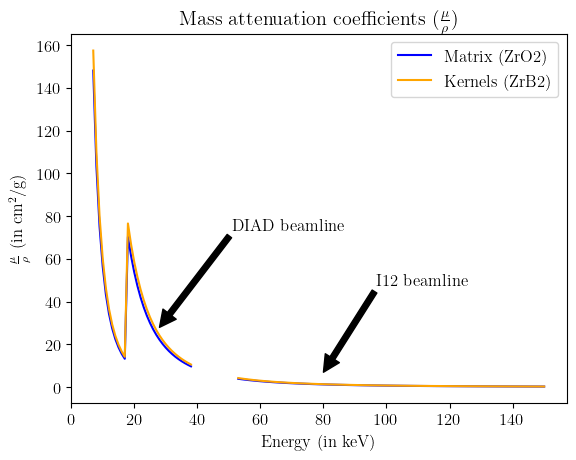

In [7]:
plt.title("Mass attenuation coefficients ($\\frac{\\mu}{\\rho}$)")
plt.plot(energy_set_DIAD, pellet_mu_rho_set_DIAD, color="blue", label="Matrix (ZrO2)")
plt.plot(energy_set_DIAD, insert_mu_rho_set_DIAD, color="orange", label="Kernels (ZrB2)")

plt.plot(energy_set_I12, pellet_mu_rho_set_I12, color="blue")
plt.plot(energy_set_I12, insert_mu_rho_set_I12, color="orange")


plt.annotate('DIAD beamline', xy=(28, 28),  xycoords='data',
            xytext=(0.55, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top',
            )

plt.annotate('I12 beamline', xy=(80, 7),  xycoords='data',
            xytext=(0.8, 0.35), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top',
            )


plt.xlabel("Energy (in keV)")
plt.ylabel("$\\frac{\\mu}{\\rho}$ (in  cm\\textsuperscript{2}/g)")
plt.legend()
plt.savefig("../results/find_energy-mock_fuel-mu_div_rho-ZrO2-vs-ZrB2.pdf")

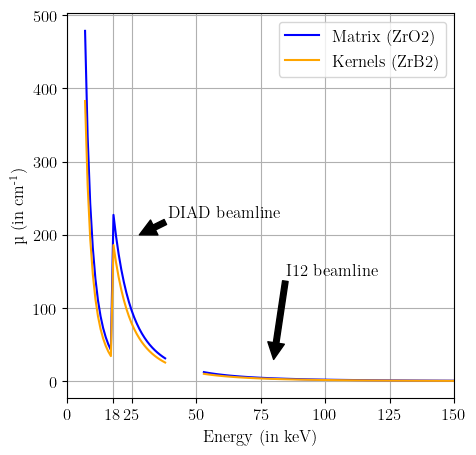

In [8]:
plt.figure(figsize=(5,5))

# plt.title("Linear attenuation coefficients ($\\mu$)")
plt.plot(energy_set_DIAD, pellet_mu_set_DIAD, color="blue", label="Matrix (ZrO2)")
plt.plot(energy_set_DIAD, insert_mu_set_DIAD, color="orange", label="Kernels (ZrB2)")

plt.plot(energy_set_I12, pellet_mu_set_I12, color="blue")
plt.plot(energy_set_I12, insert_mu_set_I12, color="orange")
plt.grid("on")

plt.annotate('DIAD beamline', xy=(28, 200),  xycoords='data',
            xytext=(0.55, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top',
            )

plt.annotate('I12 beamline', xy=(80, 30),  xycoords='data',
            xytext=(0.8, 0.35), textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),
            horizontalalignment='right', verticalalignment='top',
            )

extraticks=[18]
plt.xticks(list(plt.xticks()[0]) + extraticks)

plt.xlim((0,150))
# plt.ylim((0,110))

plt.xlabel("Energy (in keV)")
plt.ylabel("{\\textmu} (in cm\\textsuperscript{-1})")
plt.legend()

plt.savefig("../results/find_energy-mock_fuel-mu-ZrO2-vs-ZrB2-with-measured-rho.pdf")

# What is the energy that maximises the difference in attenuation coefficients?

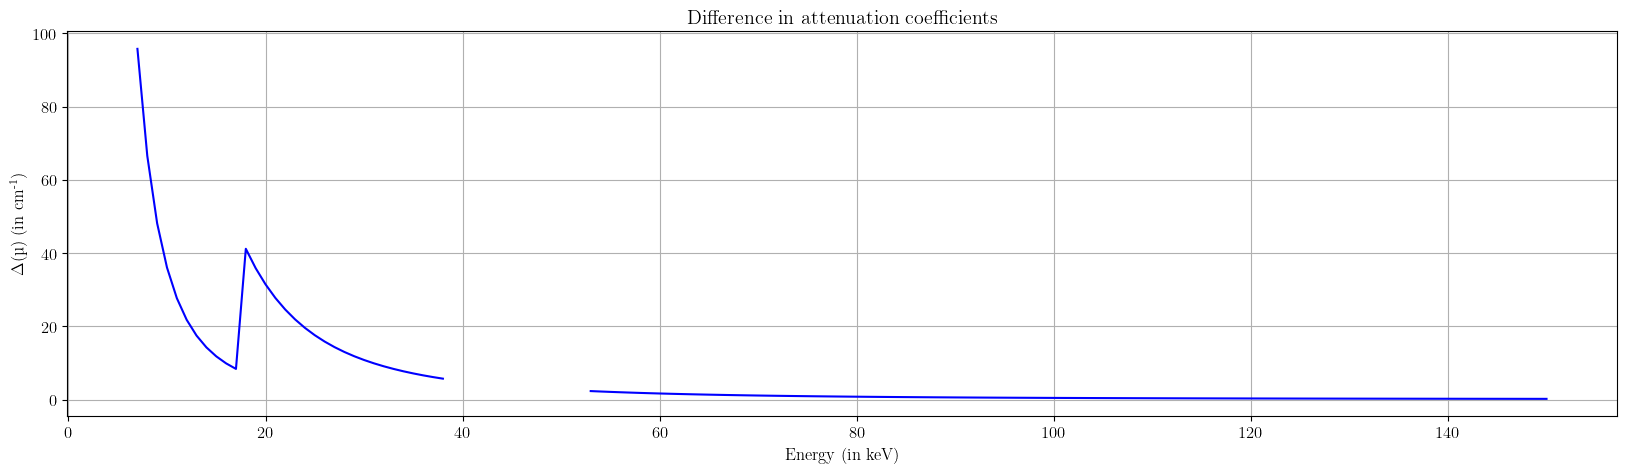

In [9]:
plt.figure(figsize=(20,5))
plt.plot(energy_set_DIAD, delta_mu_set_DIAD, color="blue")
plt.plot(energy_set_I12, delta_mu_set_I12, color="blue")
plt.grid("on")

plt.title("Difference in attenuation coefficients")
plt.xlabel("Energy (in keV)")
plt.ylabel("$\Delta$(\\textmu) (in cm\\textsuperscript{-1})")

plt.savefig("../results/find_energy-mock_fuel-delta_mu-with-measured-rho.pdf")

In [10]:
best_id = np.argmax(delta_mu_set)
best_energy = energy_set[best_id]
best_pellet_mu = pellet_mu_set[best_id]
best_insert_mu = insert_mu_set[best_id]
best_delta_mu = delta_mu_set[best_id]
pellet_radius_in_cm = 0.5

print("Difference in mu is greater at", best_energy, "keV")
print("mu Pellet (ZrO2) is", "{:.2f}".format(best_pellet_mu), "cm-1")
print("mu Inserts (ZrB2) is", "{:.2f}".format(best_insert_mu), "cm-1")
print("delta mu is", "{:.2f}".format(best_delta_mu), "cm-1")

Difference in mu is greater at 7 keV
mu Pellet (ZrO2) is 478.49 cm-1
mu Inserts (ZrB2) is 382.71 cm-1
delta mu is 95.78 cm-1


# Issue: At 7 keV, 0 photon reach the detector

A scan at 7 keV for this material and thickness won't work as photons will not cross the matter.

$\exp\left(- \left(\left(478.49 \times 0.1 \right) + \left(382.71 \times 0.01\right)\right)\right) = 0.000$

In [11]:
print("exp(-" + str(best_pellet_mu) + " x " + str(2.0 * pellet_radius_in_cm) + ") =",  "{:.4f}".format(math.exp(-best_pellet_mu * 2.0 * pellet_radius_in_cm)))


print("exp(-((478.49 x 0.1) + (382.71 x 0.01))) =", math.exp(-((best_pellet_mu * 2*pellet_radius_in_cm) + (best_insert_mu * 0.01))))


exp(-478.48758094355713 x 1.0) = 0.0000
exp(-((478.49 x 0.1) + (382.71 x 0.01))) = 3.415043969566039e-210


# Issue: At 18 keV, 0 photon reach the detector

A scan at 18 keV for this material and thickness won't work as photons will not cross the matter.

$\exp(-227.34 \times 1) = 0.0000$

In [12]:
print("exp(-" + str(gvxr.getLinearAttenuationCoefficient("Matrix", 18, "keV")) + " x " + str(2.0 * pellet_radius_in_cm) + ") =",  "{:.4f}".format(math.exp(-gvxr.getLinearAttenuationCoefficient("Matrix", 18, "keV") * 2.0 * pellet_radius_in_cm)))

exp(-227.34333079843566 x 1.0) = 0.0000


# Solution: Find a "best" compromise

A higher energy must be used to maximise both:

1. $\left|\mu(\text{pellet}, E) - \mu(\text{inserts}, E)\right|$
2. $\exp\left(-\mu(\text{pellet}, E) \times 1.0\right)$

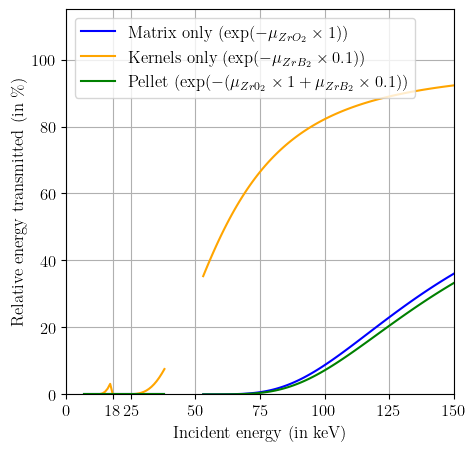

In [13]:
plt.figure(figsize=(5,5))

plt.plot(energy_set_DIAD, 100 * np.exp(-pellet_mu_set_DIAD * 1), color="blue", label="Matrix only $(\\exp(-\\mu_{ZrO_2} \\times 1))$")
plt.plot(energy_set_DIAD, 100 * np.exp(-insert_mu_set_DIAD * 0.1), color="orange", label="Kernels only $(\\exp(-\\mu_{ZrB_2} \\times 0.1))$")
plt.plot(energy_set_DIAD, 100 * np.exp(-insert_mu_set_DIAD * 0.1 - pellet_mu_set_DIAD * 1), color="green", label="Pellet $(\\exp(-(\\mu_{Zr0_2} \\times 1 + \\mu_{ZrB_2} \\times 0.1))$")

plt.plot(energy_set_I12, 100 * np.exp(-pellet_mu_set_I12 * 1), color="blue")
plt.plot(energy_set_I12, 100 * np.exp(-insert_mu_set_I12 * 0.1), color="orange")
plt.plot(energy_set_I12, 100 * np.exp(-insert_mu_set_I12 * 0.1 - pellet_mu_set_I12 * 1), color="green")

plt.xlabel("Incident energy (in keV)")
plt.ylabel("Relative energy transmitted (in \%)")
plt.legend()
plt.grid("on")
# plt.axis("equal")
# plt.xticks(np.concatenate(np.arange(0, 150, step=20))
# plt.yticks(np.arange(0, 100, step=20))

extraticks=[18]
plt.xticks(list(plt.xticks()[0]) + extraticks)

plt.xlim((0,150))
plt.ylim((0,115))

plt.savefig("../results/find_energy-mock_fuel-beer-ZrO2-vs-ZrB2-with-measured-rho.pdf")

In [14]:
# gvxr.terminate()